### 1. Import library

In [1]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

### 2. Load configuration

In [2]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
# Loading tensorflow model
model = load_model("mask_recog.h5")

### 3. Define function

In [3]:
def face_mask_detector(frame):
    # Convert image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
    
    # Using haarcascade to find the face
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.2,
                                         minNeighbors=5,
                                         minSize=(30, 30),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list = []
    preds = []
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
    
    # Loops throught each face
    for (x, y, w, h) in faces:        
        # Resize the face frame to match the trained model size, convert it to array then preprocess then predict
        face_frame = frame[y:y + h, x:x + w]
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame = preprocess_input(face_frame)        
        faces_list.append(face_frame)
        if len(faces_list) > 0:
            preds = model.predict(faces_list)
        
        # Extract the confidence value from model 
        for pred in preds:
            (mask, withoutMask) = pred
            
        # Compare confidence value between 'Mask' and 'No mask'
        label = "Mask" if mask > withoutMask else "No Mask"
        
        # Set the color of rectangle box and text, then draw it in the frame
        color = (0, 255, 0) if label == "Mask" else (255, 0, 0)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)
        
    return frame

### Test image 1

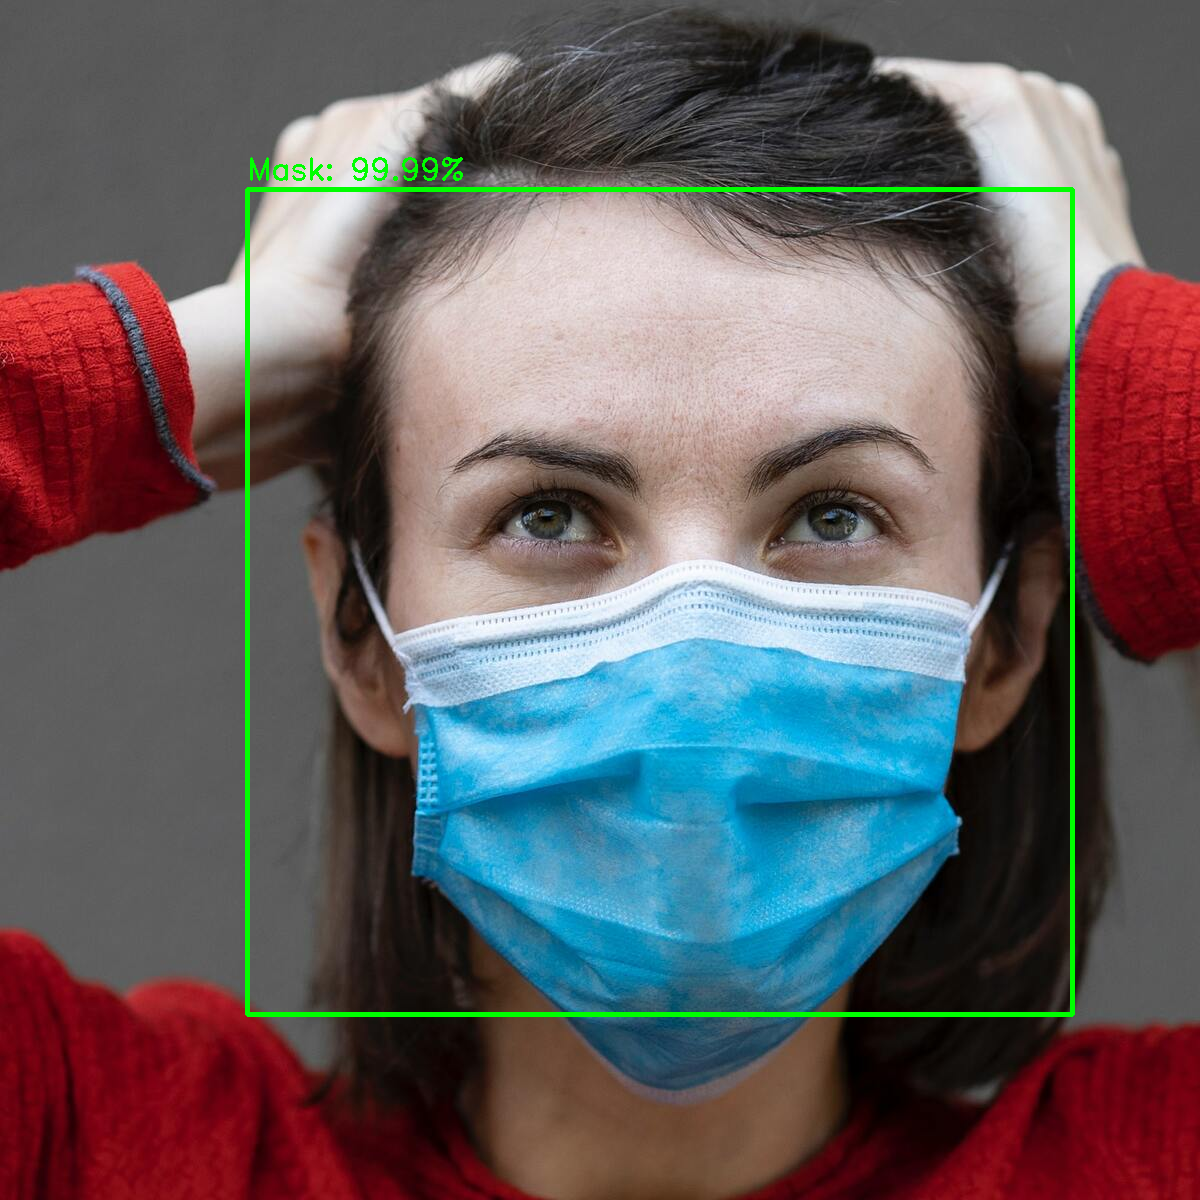

In [4]:
# Open the test image
input_image = cv2.imread("image1.jpg")

# Perform prediction using face mask detector function
output = face_mask_detector(input_image)

# Display the detected image
display(Image.fromarray(output))

### Test image 2

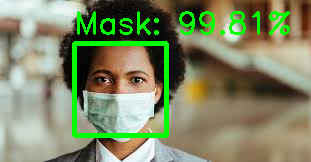

In [5]:
input_image = cv2.imread("image2.jpg")
output = face_mask_detector(input_image)
display(Image.fromarray(output))

### Test image 3

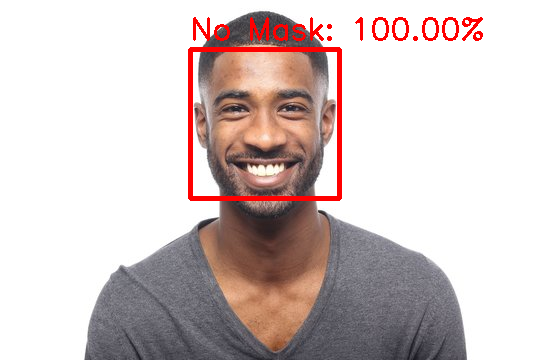

In [6]:
input_image = cv2.imread("image3.jpg")
output = face_mask_detector(input_image)
display(Image.fromarray(output))